In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [8]:
df= pd.read_csv('../data/googleplaystore.csv')

In [9]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
print(df.isnull().sum().sort_values(ascending=False))

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64


In [7]:
df=df.dropna()

In [8]:
df.shape

(9360, 13)

In [9]:

df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [10]:
dup_count = df.duplicated(subset=["App"]).sum()
print(f"\nDuplicate rows by 'App': {dup_count}")


Duplicate rows by 'App': 1170


In [11]:
df=df.drop_duplicates(subset=['App'],keep='first')

In [12]:
dup_count = df.duplicated(subset=["App"]).sum()
print(f"\nDuplicate rows by 'App': {dup_count}")


Duplicate rows by 'App': 0


In [13]:
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]


In [14]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [15]:
# Clean text columns (remove extra spaces and fix case)
df['App'] = df['App'].str.strip().str.title()
df['Category'] = df['Category'].str.strip().str.upper()
df['Type'] = df['Type'].str.strip().str.title()
df['Content Rating'] = df['Content Rating'].str.strip().str.title()
df['Genres'] = df['Genres'].str.strip().str.title()
df['Android Ver'] = df['Android Ver'].str.strip()
df['Current Ver'] = df['Current Ver'].str.strip()


In [16]:
df['Reviews'] = df['Reviews'].astype(str).str.replace(',', '')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')


In [17]:
df['Installs'] = df['Installs'].astype(str).str.replace('[,+]', '',regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')


In [18]:
df['Price'] = df['Price'].astype(str).str.replace('[,$]', '',regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [19]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [20]:
def size_to_mb(size):
    size = str(size).strip()
    if size == 'Varies with device':
        return np.nan
    elif 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return np.nan

df['Size'] = df['Size'].apply(size_to_mb)


In [21]:
df[['Reviews', 'Installs', 'Size', 'Price']].info()


<class 'pandas.core.frame.DataFrame'>
Index: 8190 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reviews   8190 non-null   int64  
 1   Installs  8190 non-null   int64  
 2   Size      7021 non-null   float64
 3   Price     8190 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 319.9 KB


In [22]:
df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1169
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [23]:
median_size = df['Size'].median()
print(f"Median Size: {median_size} MB")


Median Size: 13.0 MB


In [24]:
df['Size'].fillna(median_size, inplace=True)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8190 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8190 non-null   object 
 1   Category        8190 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         8190 non-null   int64  
 4   Size            8190 non-null   float64
 5   Installs        8190 non-null   int64  
 6   Type            8190 non-null   object 
 7   Price           8190 non-null   float64
 8   Content Rating  8190 non-null   object 
 9   Genres          8190 non-null   object 
 10  Last Updated    8190 non-null   object 
 11  Current Ver     8190 non-null   object 
 12  Android Ver     8190 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 895.8+ KB


In [26]:
df.to_csv('cleaned_data.csv', index=False)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')


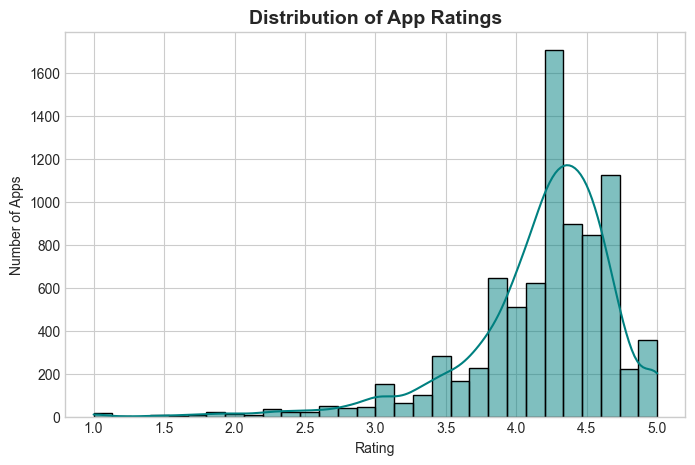

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=30, kde=True, color='teal')
plt.title('Distribution of App Ratings', fontsize=14, weight='bold')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()


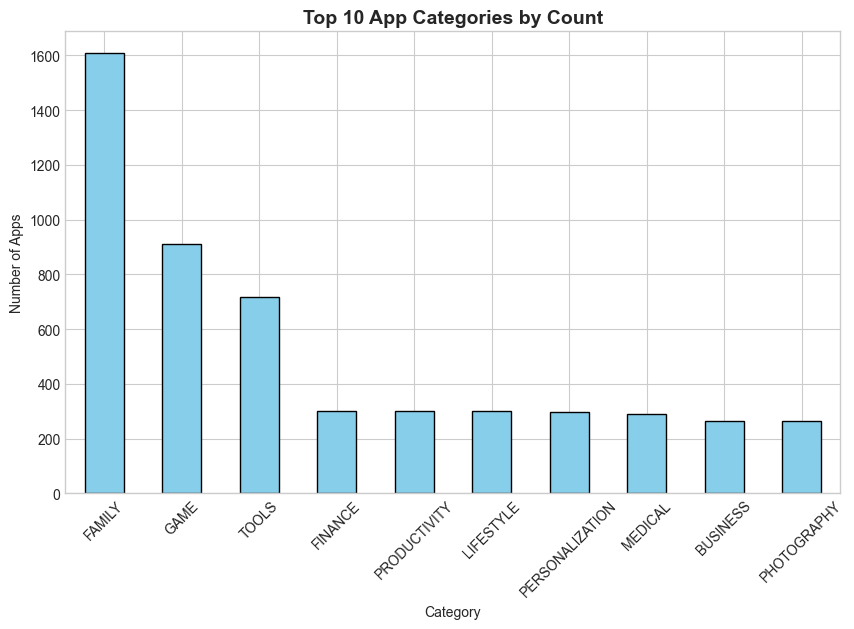

In [29]:
plt.figure(figsize=(10,6))
df['Category'].value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 App Categories by Count', fontsize=14, weight='bold')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()


C:\Users\whoam\AppData\Local\Temp\ipykernel_8568\1524875211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='Set2', edgecolor='black',order=['Free','Paid'])


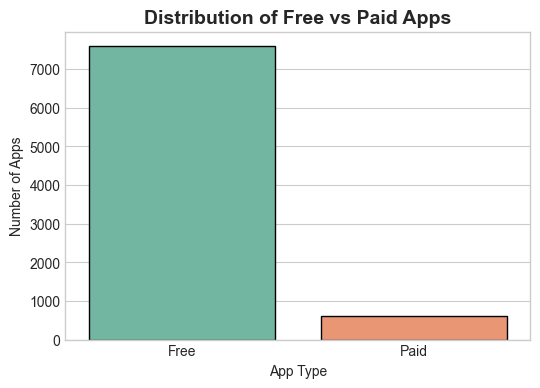

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x='Type', data=df, palette='Set2', edgecolor='black',order=['Free','Paid'])
plt.title('Distribution of Free vs Paid Apps', fontsize=14, weight='bold')
plt.xlabel('App Type')
plt.ylabel('Number of Apps')
plt.show()


C:\Users\whoam\AppData\Local\Temp\ipykernel_8568\3978864474.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='Set3')


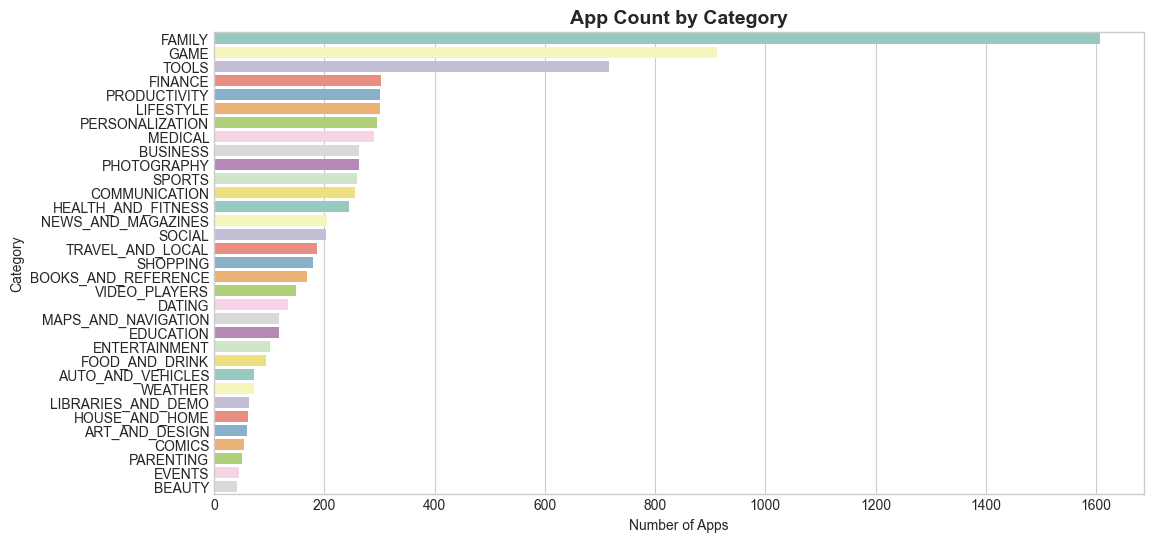

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='Set3')
plt.title('App Count by Category', fontsize=14, weight='bold')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()


C:\Users\whoam\AppData\Local\Temp\ipykernel_8568\3394374908.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Review_Group', y='Rating', data=df, palette='mako')


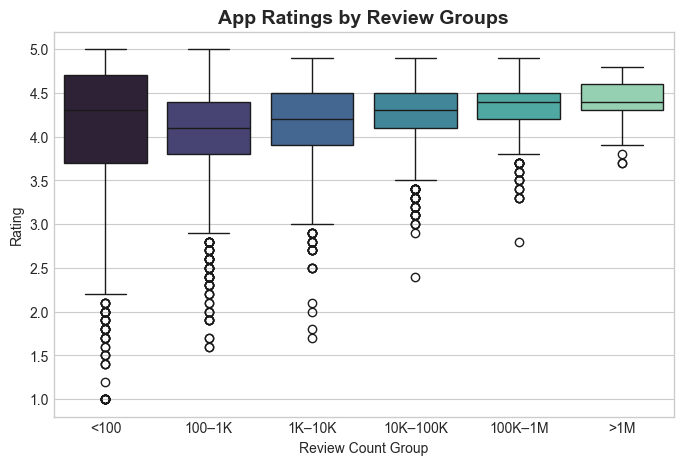

In [32]:
# Create bins (groups) for review counts
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000]
labels = ['<100', '100–1K', '1K–10K', '10K–100K', '100K–1M', '>1M']
df['Review_Group'] = pd.cut(df['Reviews'], bins=bins, labels=labels)


plt.figure(figsize=(8,5))
sns.boxplot(x='Review_Group', y='Rating', data=df, palette='mako')
plt.title('App Ratings by Review Groups', fontsize=14, weight='bold')
plt.xlabel('Review Count Group')
plt.ylabel('Rating')
plt.show()


In [33]:
print(df.duplicated(subset=['App']).value_counts())
print(df['Type'].unique())

False    8174
True       16
Name: count, dtype: int64
['Free' 'Paid']


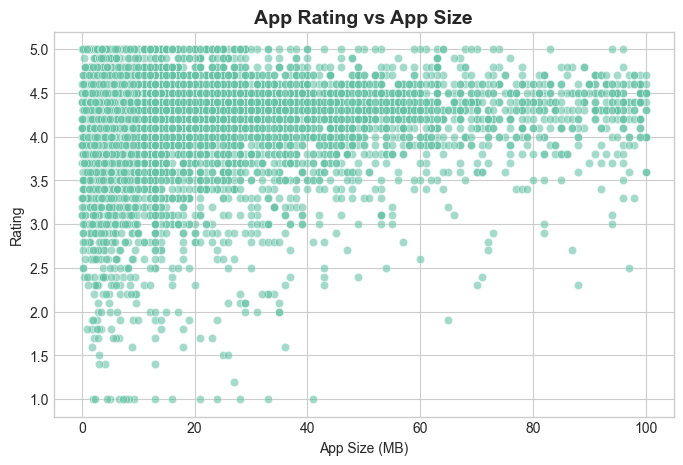

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Size', y='Rating', data=df, alpha=0.6)
plt.title('App Rating vs App Size', fontsize=14, weight='bold')
plt.xlabel('App Size (MB)')
plt.ylabel('Rating')
plt.show()


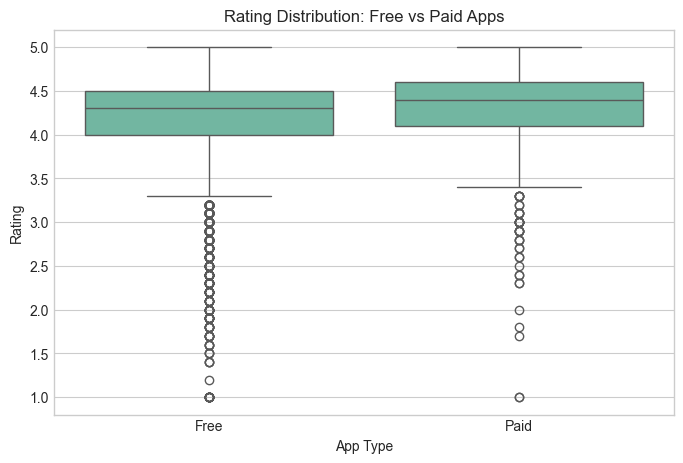

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Type', y='Rating', data=df)
plt.title('Rating Distribution: Free vs Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.show()


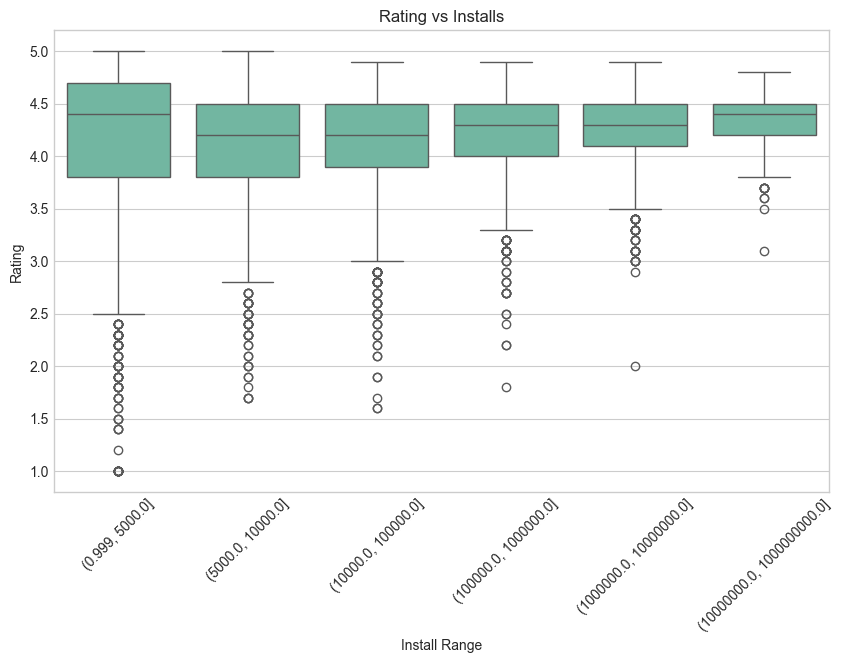

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x=pd.qcut(df['Installs'], q=6), y='Rating',data=df)
plt.title('Rating vs Installs')
plt.xlabel('Install Range')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()



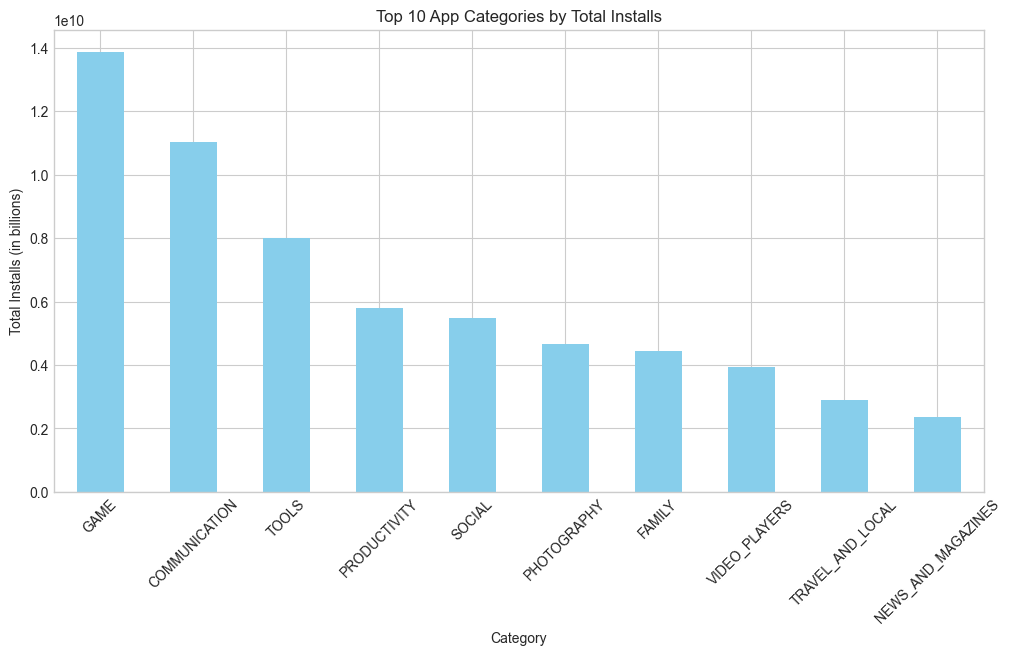

In [37]:
cat_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
cat_installs[:10].plot(kind='bar', color='skyblue')
plt.title('Top 10 App Categories by Total Installs')
plt.ylabel('Total Installs (in billions)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()



In [38]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

Category
GAME                   13878762717
COMMUNICATION          11038241530
TOOLS                   7999224500
PRODUCTIVITY            5793070180
SOCIAL                  5487841475
PHOTOGRAPHY             4649143130
FAMILY                  4427429590
VIDEO_PLAYERS           3926797200
TRAVEL_AND_LOCAL        2894859300
NEWS_AND_MAGAZINES      2369110650
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665791655
PERSONALIZATION         1532341930
SHOPPING                1400331540
HEALTH_AND_FITNESS      1144006220
SPORTS                  1096431465
BUSINESS                 697018120
LIFESTYLE                503741120
MAPS_AND_NAVIGATION      503267560
FINANCE                  455312400
WEATHER                  361096500
EDUCATION                352852000
FOOD_AND_DRINK           211677750
DATING                   140912410
ART_AND_DESIGN           114228100
HOUSE_AND_HOME            97082000
AUTO_AND_VEHICLES         53129800
LIBRARIES_AND_DEMO        51083000
COMICS     

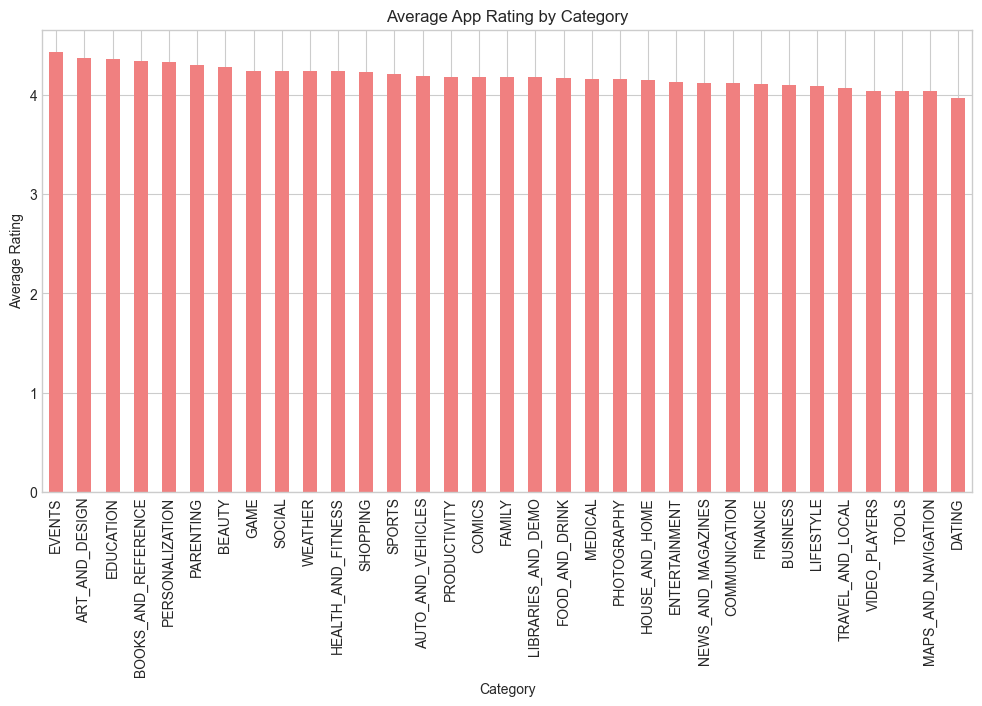

In [39]:
avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
avg_rating.plot(kind='bar', color='lightcoral')
plt.title('Average App Rating by Category')
plt.ylabel('Average Rating')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.show()


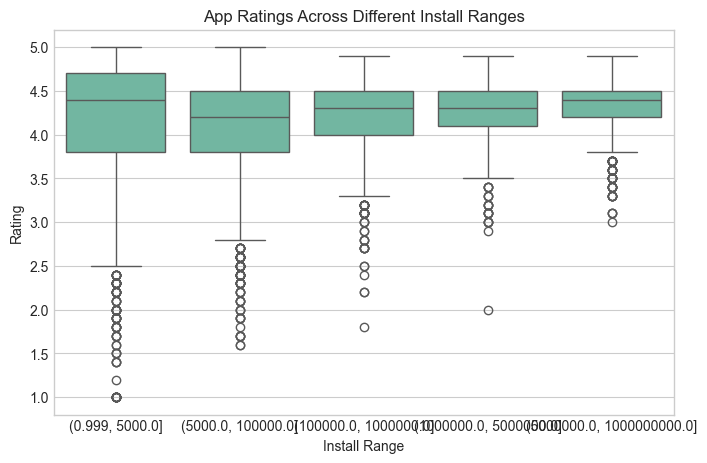

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x=pd.qcut(df['Installs'], q=5, duplicates='drop'), y='Rating', data=df)
plt.title('App Ratings Across Different Install Ranges')
plt.xlabel('Install Range')
plt.ylabel('Rating')
plt.show()


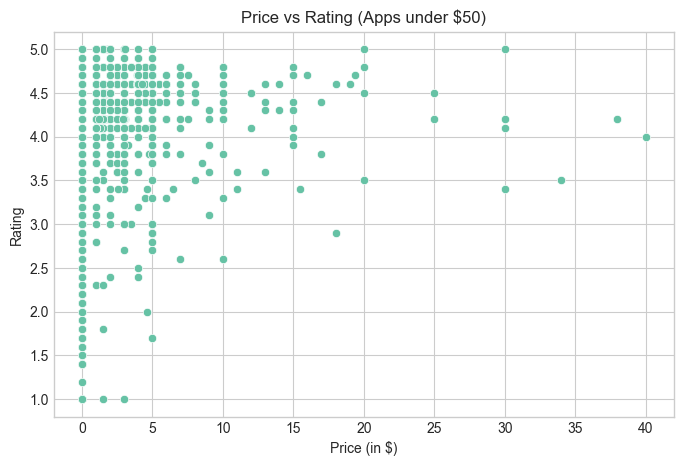

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Price', y='Rating', data=df[df['Price'] < 50])
plt.title('Price vs Rating (Apps under $50)')
plt.xlabel('Price (in $)')
plt.ylabel('Rating')
plt.show()


In [42]:
df_model = df[['Category','Reviews','Size','Installs','Type','Price','Content Rating','Genres','Rating']].dropna()


In [43]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Category','Type','Content Rating','Genres']
le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])


In [44]:
X = df_model.drop('Rating', axis=1)
y = df_model['Rating']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
y_pred = rf_model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# R² Score
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # take square root manually

print(f"R² Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")



R² Score: 0.12
MAE: 0.35
RMSE: 0.51


In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred) ** 0.5  # square root manually

print(f"R² Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.12
MAE: 0.35
RMSE: 0.51


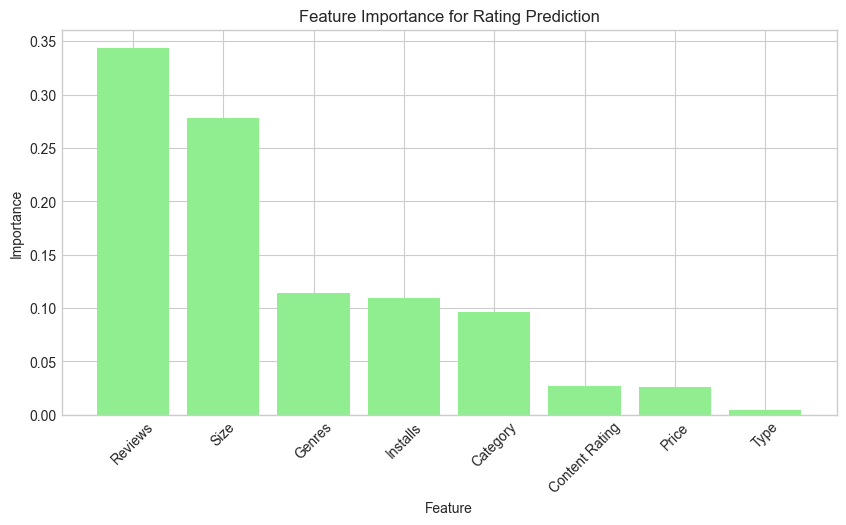

,Feature,Importance
1,Reviews,0.343637
2,Size,0.278535
7,Genres,0.114088
3,Installs,0.109860
0,Category,0.096036
6,Content Rating,0.027307
5,Price,0.025643
4,Type,0.004894


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='lightgreen')
plt.title('Feature Importance for Rating Prediction')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.show()

feature_importance


In [49]:
df_powerbi = df[['App','Category','Rating','Reviews','Size','Installs',
                 'Type','Price','Content Rating','Genres','Last Updated']]

df_powerbi.to_csv('google_playstore_for_powerbi.csv', index=False)
